# Airline Passenger Satisfaction Model

In [81]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from plotly.offline import iplot
import cufflinks as cf
import sheryanalysis as sh 
import warnings 
warnings.filterwarnings('ignore')
cf.go_offline()
cf.set_config_file(world_readable=True, theme='pearl')

In [82]:
df=pd.read_csv("train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


# EDA (Exploratory Data Analysis)

In [83]:
df.shape

(103904, 25)

In [84]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [86]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [87]:
(df==0).sum()

Unnamed: 0                               1
id                                       0
Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                 3103
Departure/Arrival time convenient     5300
Ease of Online booking                4487
Gate location                            1
Food and drink                         107
Online boarding                       2428
Seat comfort                             1
Inflight entertainment                  14
On-board service                         3
Leg room service                       472
Baggage handling                         0
Checkin service                          1
Inflight service                         3
Cleanliness                             12
Departure Delay in Minutes           58668
Arrival Del

In [88]:
df.duplicated().sum()

0

In [89]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

<Axes: xlabel='satisfaction', ylabel='count'>

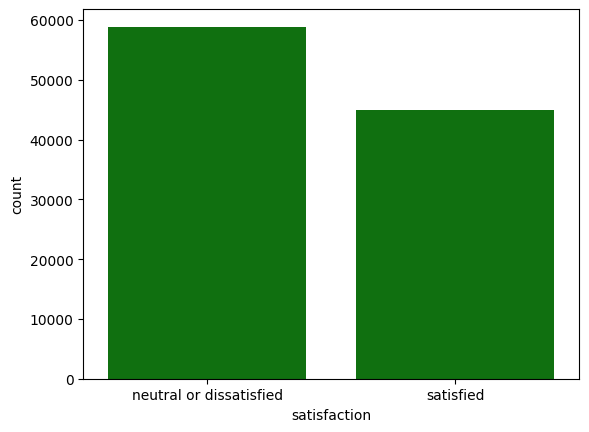

In [90]:
sns.countplot(x=df['satisfaction'],color='green')

In [91]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['satisfaction']=encoder.fit_transform(df['satisfaction'])
df['satisfaction'].value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

In [92]:
numerical_cols=df.select_dtypes(include='number').columns
categ_cols=df.select_dtypes(include='object').columns
print("Total Numerical Columns: ",len(numerical_cols))
for i in numerical_cols: 
    print(i)
print("\nTotal Categorical Columns: ",len(categ_cols))
for i in categ_cols:
    print(i)

Total Numerical Columns:  21
Unnamed: 0
id
Age
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction

Total Categorical Columns:  4
Gender
Customer Type
Type of Travel
Class


# Data Visualization

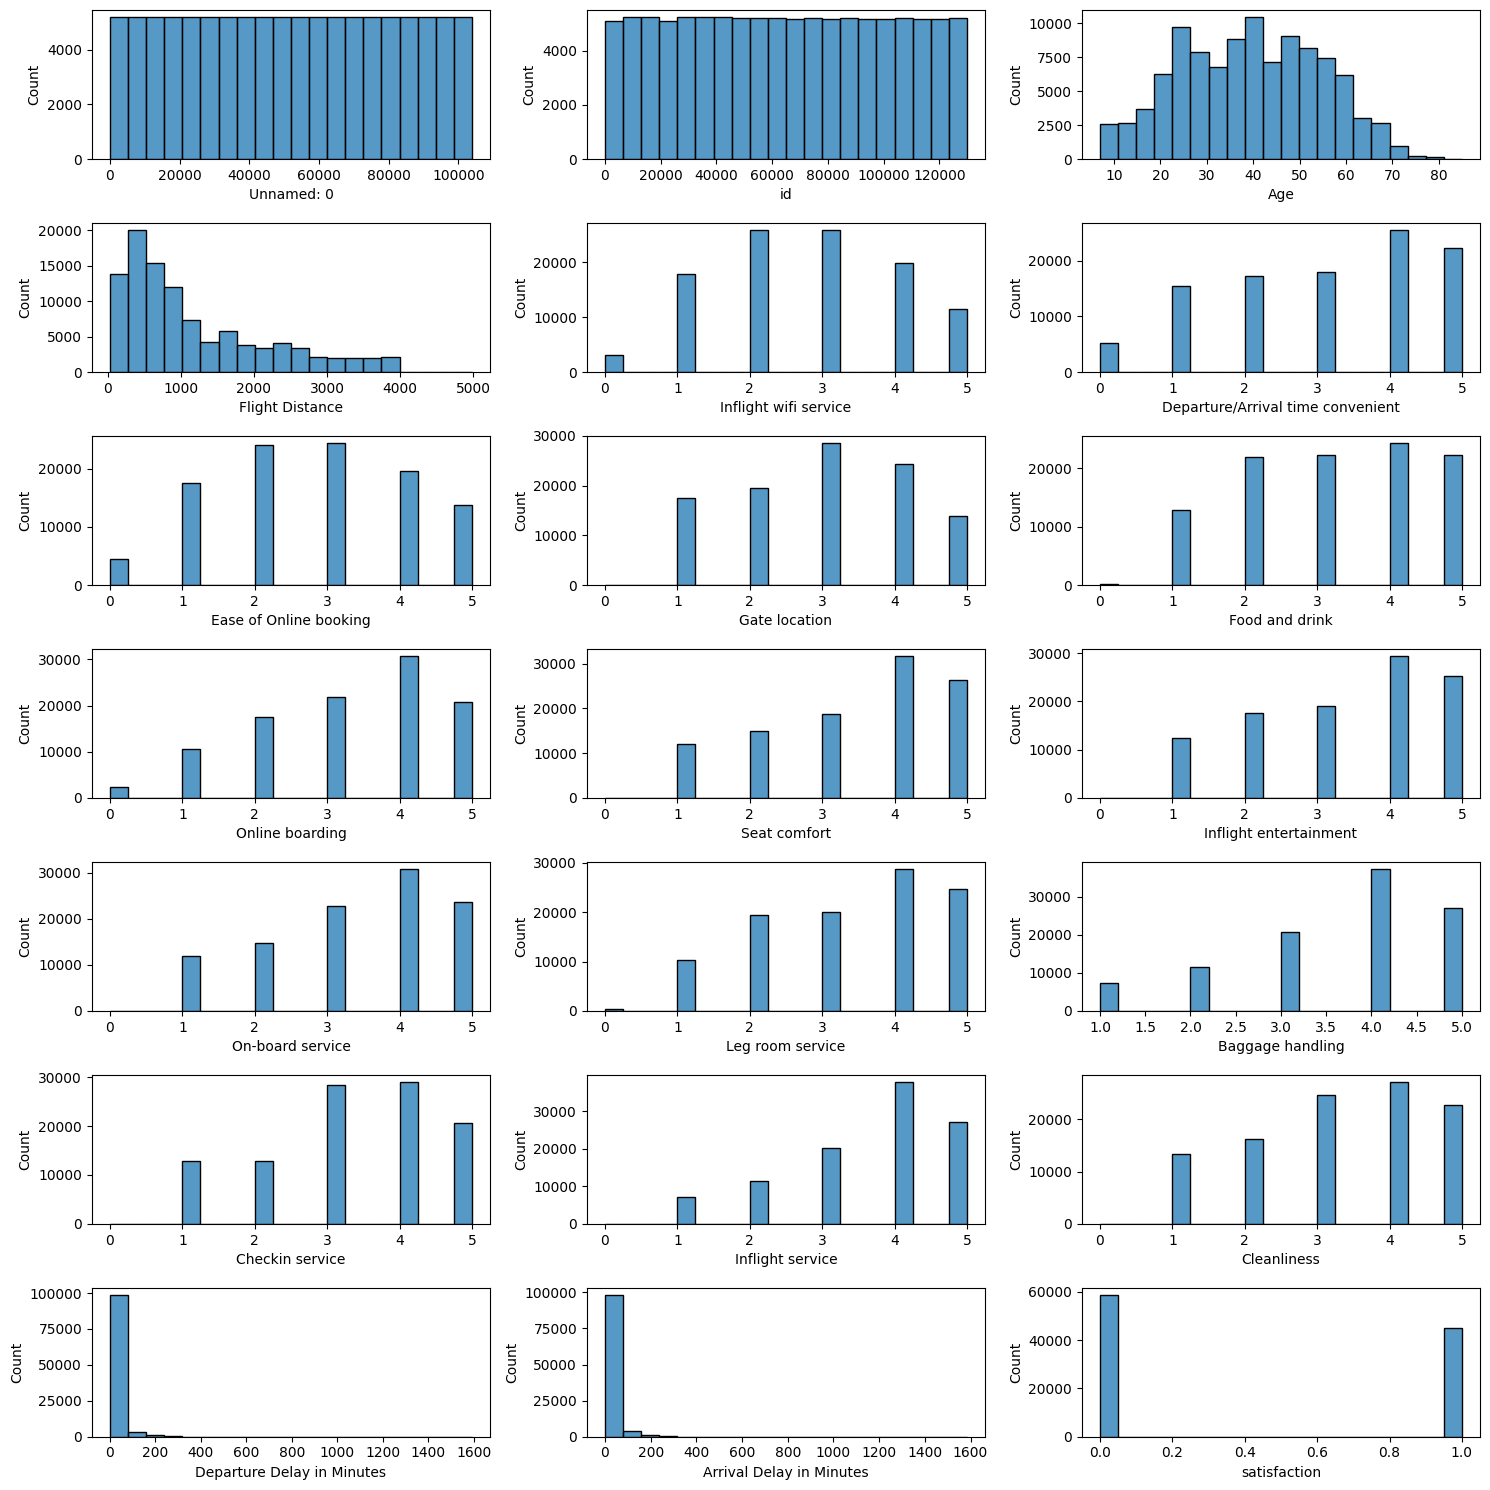

In [93]:
fig,ax=plt.subplots(7,3,figsize=(15,15))
ax=ax.flatten()
for idx,col in enumerate(numerical_cols,start=0):
    sns.histplot(data=df,x=col,ax=ax[idx],bins=20)
fig.tight_layout()

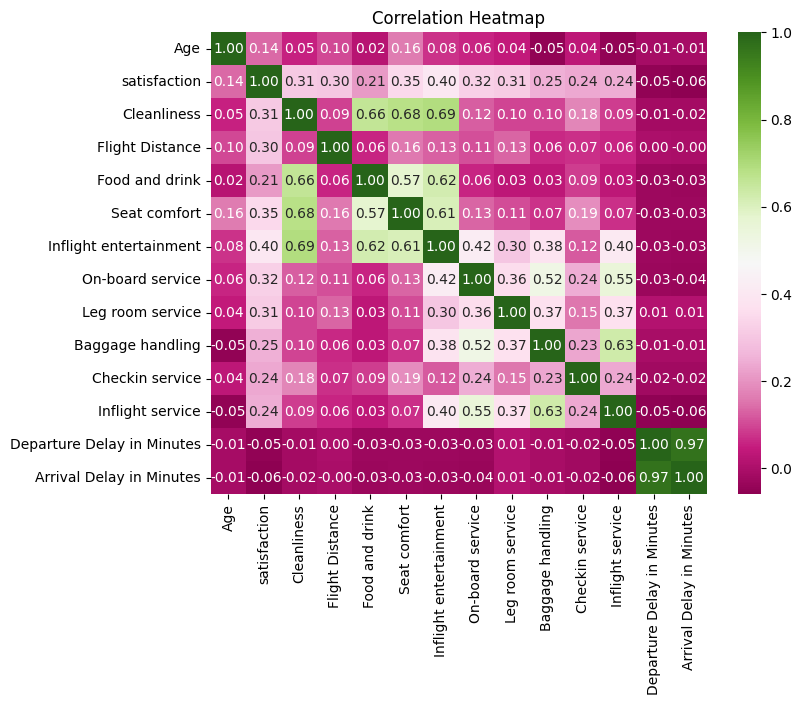

In [94]:
subset = df[['Age', 'satisfaction', 'Cleanliness', 'Flight Distance', 'Food and drink',"Seat comfort",
"Inflight entertainment","On-board service","Leg room service","Baggage handling","Checkin service","Inflight service","Departure Delay in Minutes","Arrival Delay in Minutes"]]

corr_matrix = subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(data=corr_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [95]:
df['total_delay']=df['Arrival Delay in Minutes']+df['Departure Delay in Minutes']

In [96]:
df.drop(columns=['Arrival Delay in Minutes','Departure Delay in Minutes','Unnamed: 0','id'],axis=1,inplace=True)

<Axes: xlabel='satisfaction', ylabel='count'>

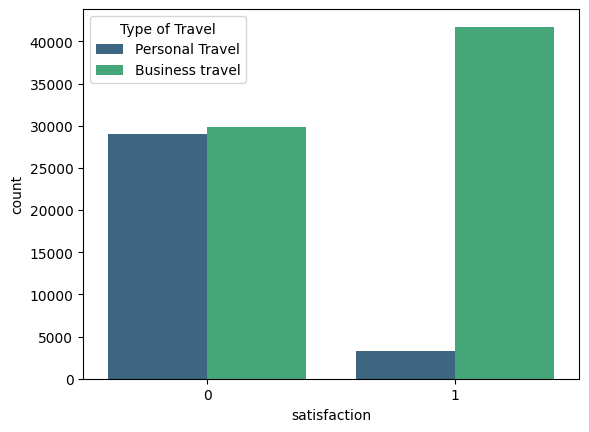

In [97]:
sns.countplot(data=df,x='satisfaction',palette='viridis',hue='Type of Travel')

<Axes: xlabel='satisfaction', ylabel='Age'>

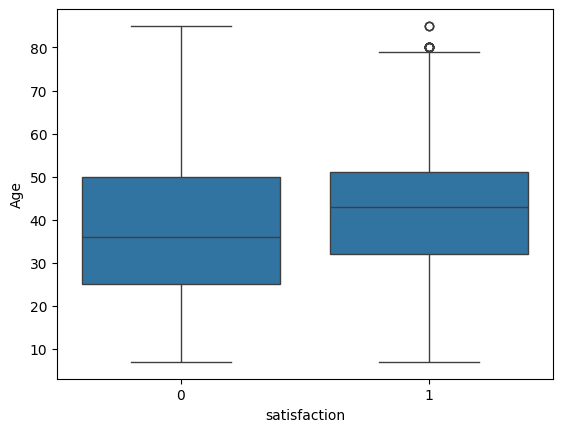

In [98]:
sns.boxplot(data=df,y='Age',x='satisfaction')

<Axes: xlabel='satisfaction', ylabel='Food and drink'>

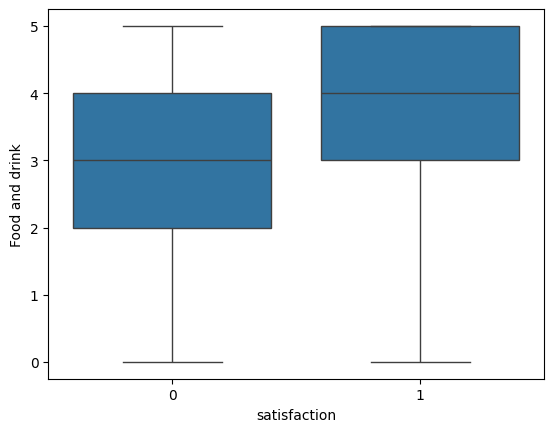

In [99]:
sns.boxplot(data=df,y='Food and drink',x='satisfaction')

<Axes: xlabel='satisfaction', ylabel='total_delay'>

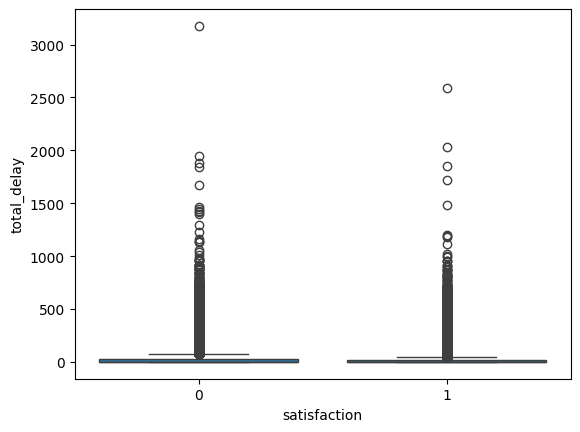

In [100]:
sns.boxplot(y=df['total_delay'],x=df['satisfaction'])

<Axes: xlabel='satisfaction', ylabel='Flight Distance'>

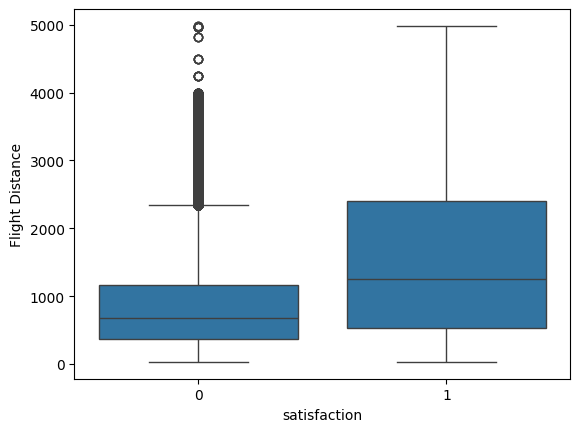

In [101]:
sns.boxplot(y=df['Flight Distance'],x=df['satisfaction'])

In [102]:
#Encoding 
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
satisfaction                           0
total_delay                          310
dtype: int64

In [103]:
df['total_delay'].fillna(df['total_delay'].median(),inplace=True)

In [104]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [105]:
df['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [106]:
df.groupby('satisfaction')['Class'].value_counts()

satisfaction  Class   
0             Eco         38044
              Business    15185
              Eco Plus     5650
1             Business    34480
              Eco          8701
              Eco Plus     1844
Name: count, dtype: int64

In [107]:
df.corr(numeric_only=True)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,total_delay
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,0.137167,-0.011215
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.298780,-0.000324
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,0.284245,-0.018389
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,-0.051601,-0.000095
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,0.171705,-0.007173
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.000682,0.005415
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,0.209936,-0.031481
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,0.503557,-0.020353
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,0.349459,-0.028716
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,0.398059,-0.029364


<Axes: xlabel='satisfaction', ylabel='Customer Type'>

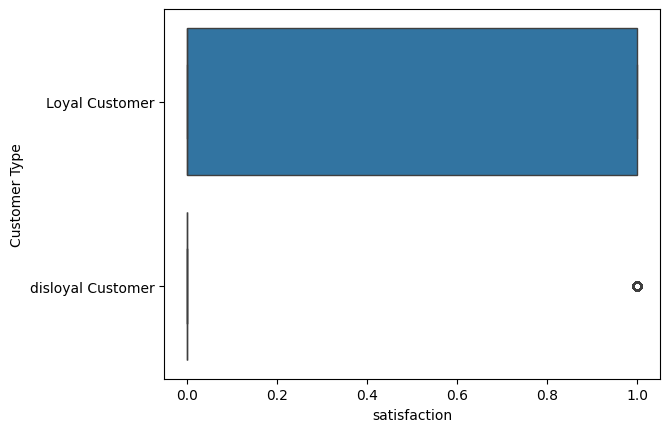

In [108]:
sns.boxplot(y=df['Customer Type'],x=df['satisfaction'])

<Axes: xlabel='satisfaction', ylabel='count'>

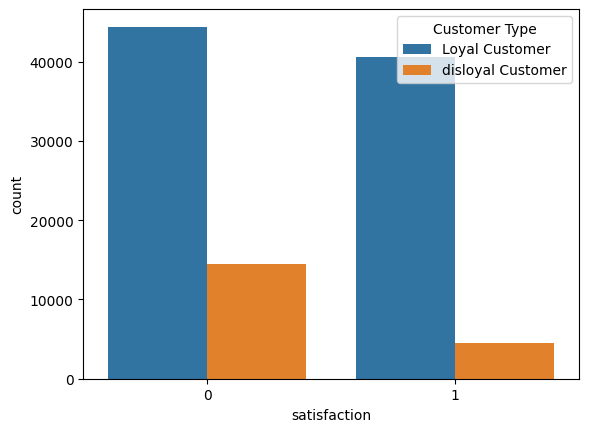

In [109]:
sns.countplot(x=df['satisfaction'],hue=df['Customer Type'])

<Axes: xlabel='total_delay', ylabel='Count'>

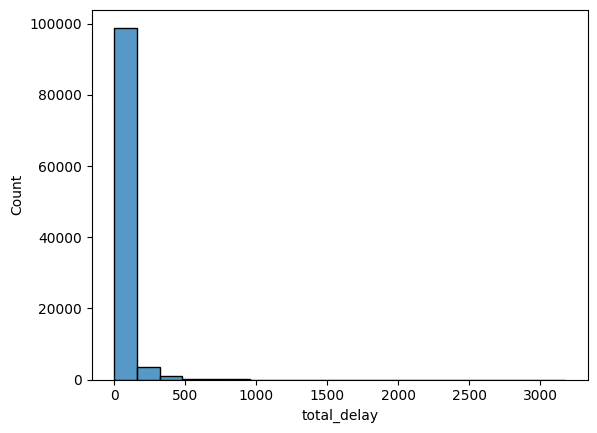

In [110]:
sns.histplot(x=df['total_delay'],bins=20)

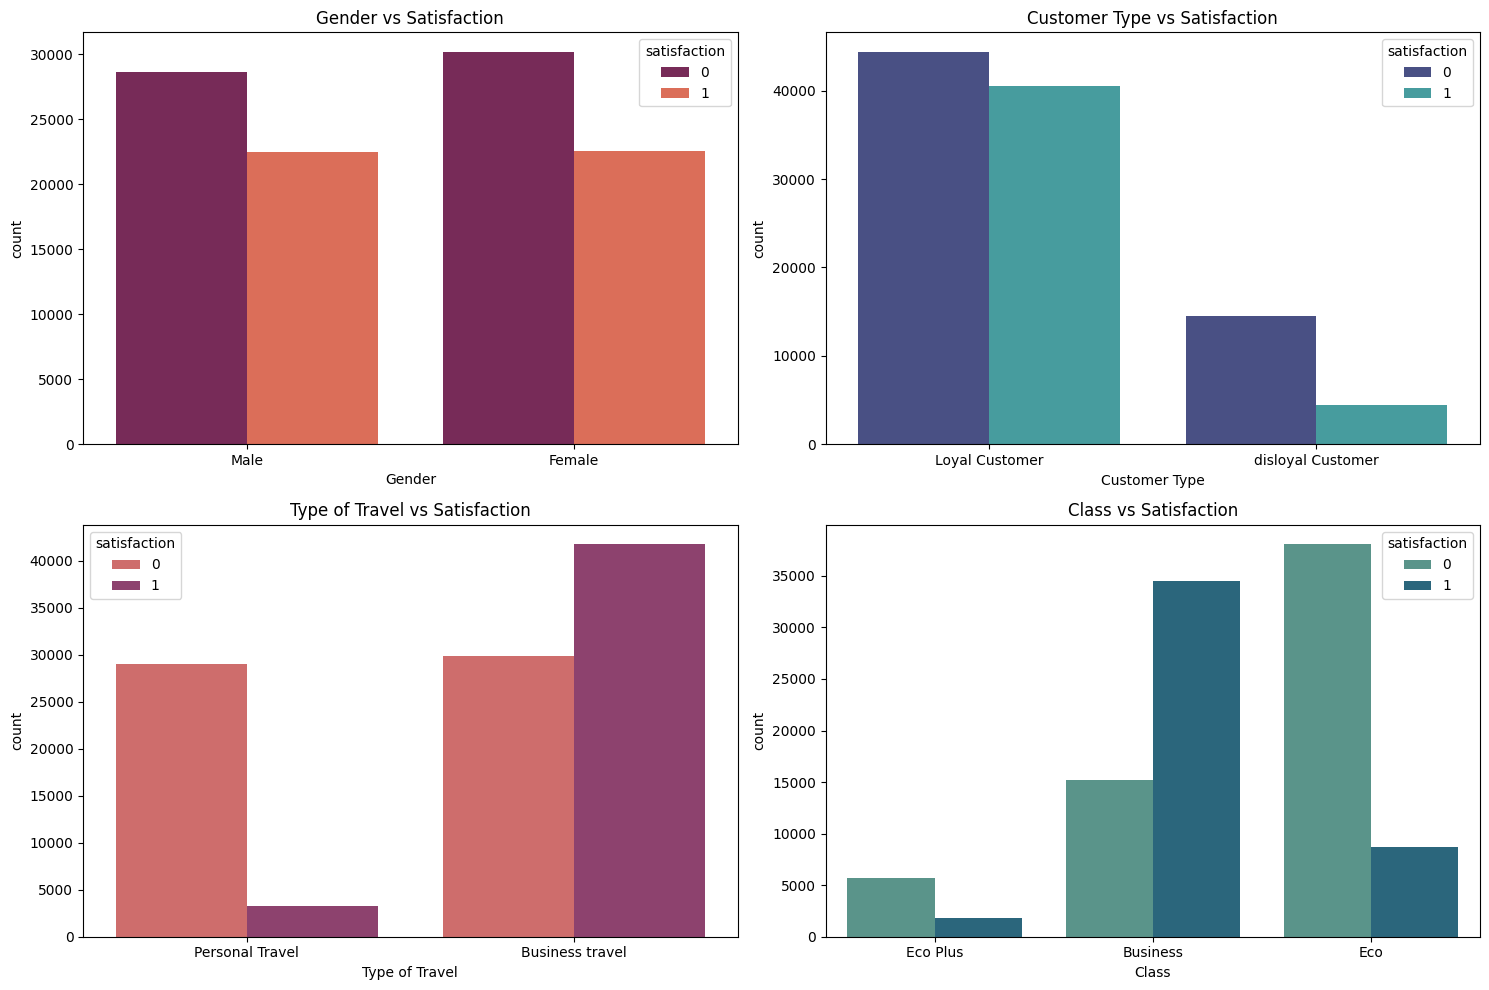

In [111]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
colors=['rocket','mako','flare','crest']
axes=axes.flatten()
for idx,col in enumerate(categ_cols,0): 
    sns.countplot(data=df ,hue='satisfaction',x=col,ax=axes[idx],palette=colors[idx])
    axes[idx].set_title(f"{col} vs Satisfaction")

fig.tight_layout()
plt.show()
    

In [112]:
class_mapping={
    'Business':1, 
    'Eco Plus':2,
    'Eco':0
    
}
df['Class']=df['Class'].map(class_mapping)
df=pd.get_dummies(data=df,drop_first=True,columns=categ_cols[:3])
print("Columns ab kaise dikh rahe hain:")
print(df.columns)
print("\nData ki shakal (First 5 rows):")
df.head()

Columns ab kaise dikh rahe hain:
Index(['Age', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction', 'total_delay', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel'],
      dtype='object')

Data ki shakal (First 5 rows):


,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,total_delay,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,13,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,43.0,True,False,True
1,25,1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,7.0,True,True,False
2,26,1,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,0.0,False,False,False
3,25,1,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,20.0,False,False,False
4,61,1,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0.0,True,False,False


In [113]:
useless_cols = ["Gender_Male", "Gate location", "Departure/Arrival time convenient"]
df.drop(columns=useless_cols, errors='ignore', inplace=True)

In [114]:
# Check karo ki Encoder ne kisko kya number diya
print("Mapping (0, 1):", encoder.classes_)

# 0 index par jo likha hai wo 0 bana.
# 1 index par jo likha hai wo 1 bana.

Mapping (0, 1): ['neutral or dissatisfied' 'satisfied']


In [115]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='satisfaction',axis=1)
X['Type of Travel_Personal Travel']=X['Type of Travel_Personal Travel'].astype(int)
X['Customer Type_disloyal Customer']=X['Customer Type_disloyal Customer'].astype(int)
y=df['satisfaction']
X_train,X_test,y_train,y_test=train_test_split(
    X,y,random_state=42,test_size=0.2
    
)

In [116]:
from sklearn.preprocessing import StandardScaler

# Columns ki list
cols_to_scale = ['Age', 'Flight Distance', 'total_delay']
median_delay = df['total_delay'].median()
df['total_delay'].fillna(median_delay, inplace=True)
scaler=StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Check karo
print("Scaling Done!")


Scaling Done!


In [117]:
X_train.head()

,Age,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,total_delay,Customer Type_disloyal Customer,Type of Travel_Personal Travel
20921,1.299867,0,-0.143103,4,4,5,4,5,2,2,4,3,5,2,4,-0.194541,0,1
36897,0.043551,1,-0.438007,4,4,1,4,5,1,4,2,4,3,5,1,0.236249,1,0
8468,1.696598,0,-0.808142,2,2,1,2,1,1,5,4,5,5,5,1,-0.390355,0,1
53490,2.027207,0,1.053565,3,3,3,5,4,5,5,3,5,3,5,5,-0.390355,0,1
78687,-0.948277,0,0.169856,2,2,1,2,1,1,1,2,3,5,2,1,-0.155379,1,0


In [118]:
X_train.shape

(83123, 18)

In [119]:
X_test.isna().sum()

Age                                0
Class                              0
Flight Distance                    0
Inflight wifi service              0
Ease of Online booking             0
Food and drink                     0
Online boarding                    0
Seat comfort                       0
Inflight entertainment             0
On-board service                   0
Leg room service                   0
Baggage handling                   0
Checkin service                    0
Inflight service                   0
Cleanliness                        0
total_delay                        0
Customer Type_disloyal Customer    0
Type of Travel_Personal Travel     0
dtype: int64

In [120]:
X_train.isna().sum()

Age                                0
Class                              0
Flight Distance                    0
Inflight wifi service              0
Ease of Online booking             0
Food and drink                     0
Online boarding                    0
Seat comfort                       0
Inflight entertainment             0
On-board service                   0
Leg room service                   0
Baggage handling                   0
Checkin service                    0
Inflight service                   0
Cleanliness                        0
total_delay                        0
Customer Type_disloyal Customer    0
Type of Travel_Personal Travel     0
dtype: int64

In [121]:
X_test.shape

(20781, 18)

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,accuracy_score

models={
    'Logistic regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Decision tree':DecisionTreeClassifier(
        criterion='gini',
    max_depth=4,              
    min_samples_split=4,      
    min_samples_leaf=2,       
    random_state=42
    ),
    'RndomForest':RandomForestClassifier(
         n_estimators=500,
    bootstrap=True, 
    n_jobs=-1,criterion='gini',oob_score=True,random_state=42,max_depth=15
    ),
    'Gradient Boosting':GradientBoostingClassifier()
}
for name,model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Accuracy check
    acc = accuracy_score(y_test, y_pred)
    report=classification_report(y_test,y_pred)
    print(f"--> {name} Accuracy: {acc*100:.2f}%")
    print("Classification Report - \n",report)
    print("-" * 30)

Training Logistic regression...
--> Logistic regression Accuracy: 87.42%
Classification Report - 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     11713
           1       0.87      0.83      0.85      9068

    accuracy                           0.87     20781
   macro avg       0.87      0.87      0.87     20781
weighted avg       0.87      0.87      0.87     20781

------------------------------
Training KNN...
--> KNN Accuracy: 92.96%
Classification Report - 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     11713
           1       0.94      0.90      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781

------------------------------
Training Decision tree...
--> Decision tree Accuracy: 88.96%
Classification Report - 
               precision    reca

In [123]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()

nb_model.fit(X_train,y_train)
y_pred_nb=nb_model.predict(X_test)
acc_nb=accuracy_score(y_test,y_pred_nb)
print(acc_nb)

0.8704585919830614


In [124]:
# from sklearn.svm import SVC
# svm_model=SVC(kernel='linear')
# svm_model.fit(X_train,y_train)
# y_pred_svm=svm_model.predict(X_test)
# acc_svm=accuracy_score(y_test,y_pred_svm)
# print(acc_svm)

In [125]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [126]:
y_pred_xgb=xgb.predict(X_test)
acc_xgb=accuracy_score(y_test,y_pred_xgb)
print(f"Accuracy from XGB : {acc_xgb*100:.2f}")
xgb_report=classification_report(y_test,y_pred_xgb)
print("Classification Report - \n",xgb_report)

Accuracy from XGB : 96.11
Classification Report - 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.95      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [127]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(n_estimators=300, learning_rate=0.3, depth=4, verbose=0)
cat.fit(X_train,y_train)

In [128]:
y_pred_cat=cat.predict(X_test)
acc_cat=accuracy_score(y_test,y_pred_cat)
print(f"Accuracy from CAT : {acc_cat*100:.2f}")
cat_report=classification_report(y_test,y_pred_cat)
print("Classification Report - \n",cat_report)

Accuracy from CAT : 96.15
Classification Report - 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [129]:
from sklearn.model_selection import cross_val_score
X_scale=X
X_scale[cols_to_scale]=scaler.fit_transform(X_scale[cols_to_scale])
X_scale

,Age,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,total_delay,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,-1.745279,2,-0.731539,3,3,5,3,5,5,4,3,4,4,5,5,0.172999,0,1
1,-0.951360,1,-0.957184,3,3,1,3,1,1,1,5,3,1,4,1,-0.300369,1,0
2,-0.885200,1,-0.047584,2,2,5,5,5,5,4,3,4,4,4,5,-0.392412,0,0
3,-0.951360,1,-0.629246,2,5,2,2,2,2,2,5,3,1,4,2,-0.129430,0,0
4,1.430397,1,-0.978244,3,3,4,5,5,3,3,4,4,3,3,3,-0.392412,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-1.083680,0,-1.000307,2,2,2,2,2,2,3,1,4,2,3,2,-0.352965,1,0
103900,0.636478,1,1.160869,4,4,2,4,5,5,5,5,5,5,5,4,-0.392412,0,0
103901,-0.620561,1,0.807860,1,1,4,1,5,4,3,2,4,5,5,4,-0.116281,1,0
103902,-1.149840,0,-0.189991,1,1,1,1,1,1,4,5,1,5,4,1,-0.392412,1,0


# CROSS VALIDATION (K FOLD CV)

In [137]:
scores=cross_val_score(
 estimator=xgb,
    X=X_scale,
    y=y,
    cv=5,
scoring='f1'
)
print("scores:",scores)
print(f"Mean: {scores.mean()*100:.2f}%")

scores: [0.9545044  0.95536369 0.9543662  0.95621222 0.9564237 ]
Mean: 95.54%


# GRID SEARCH CV

In [153]:
from sklearn.model_selection import GridSearchCV
params={
    'n_neighbors':[5,7,11,3,21]
}
knn_model=KNeighborsClassifier(n_neighbors=5)
grid_search=GridSearchCV(
    estimator=KNeighborsClassifier(),
    n_jobs=-1,
    cv=5,
    param_grid=params,
    verbose=2,
    scoring='f1'
    
)
grid_search.fit(X_scale, y)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}*100:.2f")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'n_neighbors': 5}
Best score: 0.9157386770028717*100:.2f


In [150]:
results=grid_search.cv_results_
results

{'mean_fit_time': array([0.62917924, 0.59885802, 0.37193661, 0.5044775 , 0.62145467]),
 'std_fit_time': array([0.14711554, 0.16867663, 0.12107644, 0.29309216, 0.09528628]),
 'mean_score_time': array([127.52179031, 127.84986734, 138.9328455 , 158.26313481,
        106.0253644 ]),
 'std_score_time': array([ 9.90628645, 10.33202988, 13.41128064,  2.83130714, 47.22417029]),
 'param_n_neighbors': masked_array(data=[5, 7, 11, 3, 21],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 11},
  {'n_neighbors': 3},
  {'n_neighbors': 21}],
 'split0_test_score': array([0.91507068, 0.91560482, 0.91343455, 0.91535265, 0.91061581]),
 'split1_test_score': array([0.9149347 , 0.91477984, 0.91475522, 0.91450235, 0.912668  ]),
 'split2_test_score': array([0.9147234 , 0.91515014, 0.91400856, 0.91433092, 0.90941324]),
 'split3_test_score': array([0.91605839, 0.91589427, 0.91587393, 0.91525038, 0.91231493]

In [154]:
results=pd.DataFrame(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.629179,0.147116,127.521790,9.906286,5,{'n_neighbors': 5},0.915071,0.914935,0.914723,0.916058,0.917906,0.915739,0.001177,1
1,0.598858,0.168677,127.849867,10.332030,7,{'n_neighbors': 7},0.915605,0.914780,0.915150,0.915894,0.917239,0.915734,0.000844,2
2,0.371937,0.121076,138.932845,13.411281,11,{'n_neighbors': 11},0.913435,0.914755,0.914009,0.915874,0.917156,0.915046,0.001334,4
3,0.504478,0.293092,158.263135,2.831307,3,{'n_neighbors': 3},0.915353,0.914502,0.914331,0.915250,0.915970,0.915081,0.000598,3
4,0.621455,0.095286,106.025364,47.224170,21,{'n_neighbors': 21},0.910616,0.912668,0.909413,0.912315,0.916890,0.912380,0.002543,5


In [155]:
results[['param_n_neighbors','mean_test_score']]

,param_n_neighbors,mean_test_score
0,5,0.915739
1,7,0.915734
2,11,0.915046
3,3,0.915081
4,21,0.912380


# Random Search CV

In [161]:
from sklearn.model_selection import RandomizedSearchCV

random_search=RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    cv=5,
    param_distributions=params,
    scoring='accuracy',
    n_iter=3
)
random_search.fit(X_scale,y)

,estimator,KNeighborsClassifier()
,param_distributions,"{'n_neighbors': [5, 7, ...]}"
,n_iter,3
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [160]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_*100:.2f}")

Best parameters: {'n_neighbors': 7}
Best score: 92.88
